In [ ]:
# Import Basic Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, classification_report ,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
# Read Data

In [ ]:
data=pd.read_csv("/content/heart.csv")

In [ ]:
# Data Exploration

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
70,57,M,ATA,140,265,0,ST,145,Y,1.0,Flat,1
765,41,M,NAP,112,250,0,Normal,179,N,0.0,Up,0
401,51,M,ASY,130,0,1,ST,163,N,0.0,Flat,1
848,52,M,ASY,128,255,0,Normal,161,Y,0.0,Up,1
817,60,M,ASY,125,258,0,LVH,141,Y,2.8,Flat,1


In [ ]:
data.shape

(918, 12)

In [ ]:
data.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
def show_numerical_cols(data):
    numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
    print("Numerical Columns:")
    print(numerical_cols)

# Assuming 'data' is your DataFrame
show_numerical_cols(data)

Numerical Columns:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [ ]:
def show_categorical_cols(data):
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    print("Categorical Columns:")
    print(categorical_cols)

# Assuming 'data' is your DataFrame
show_categorical_cols(data)

Categorical Columns:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


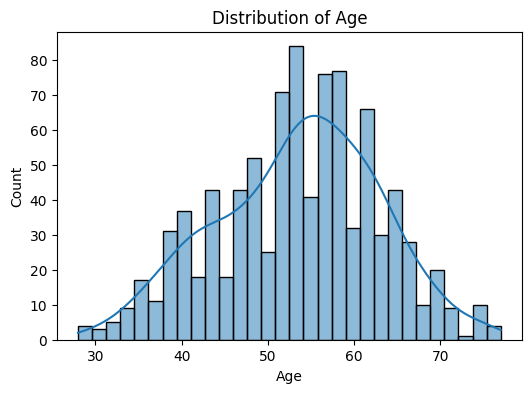

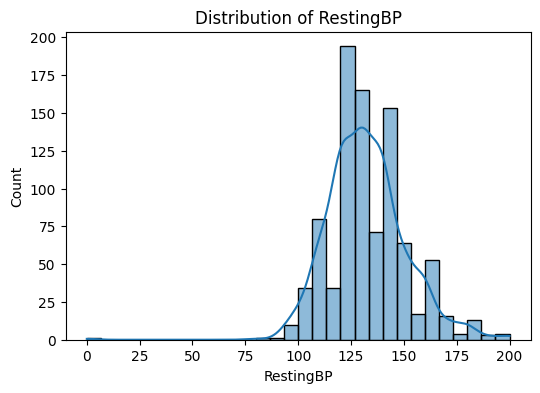

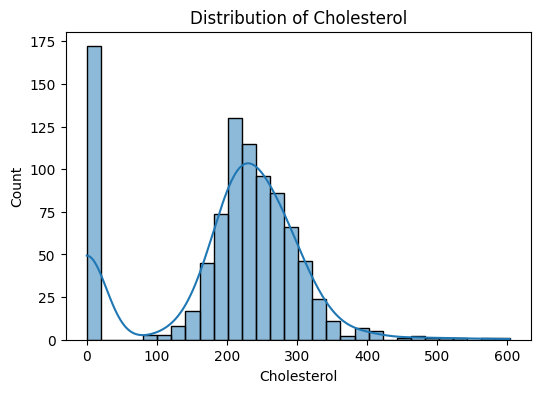

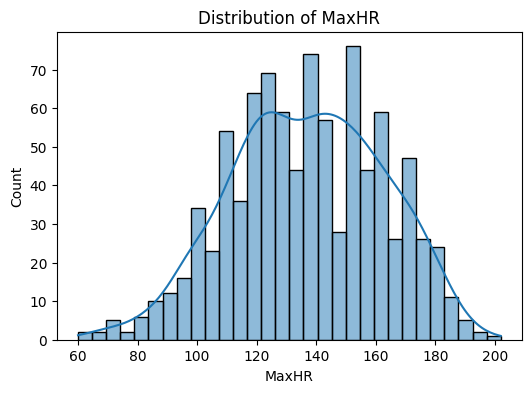

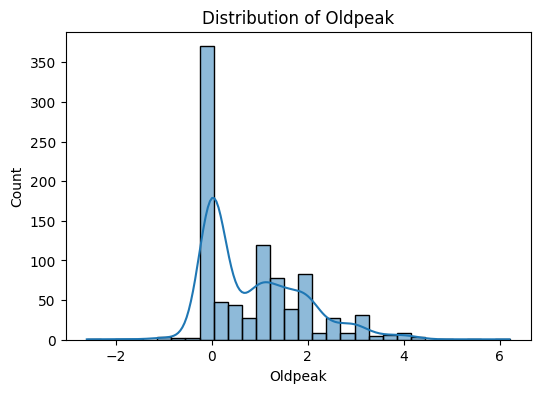

In [ ]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


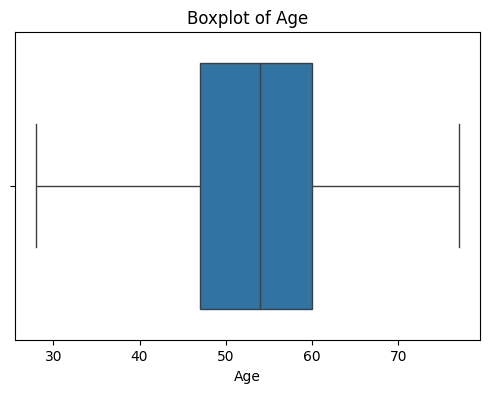

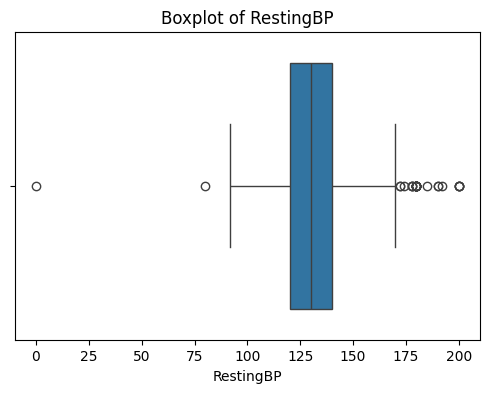

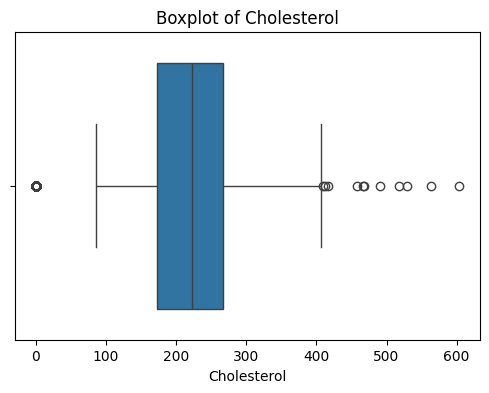

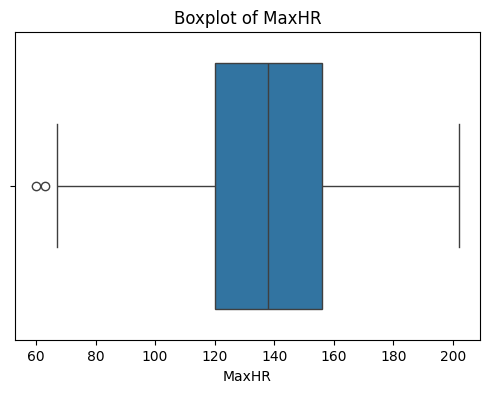

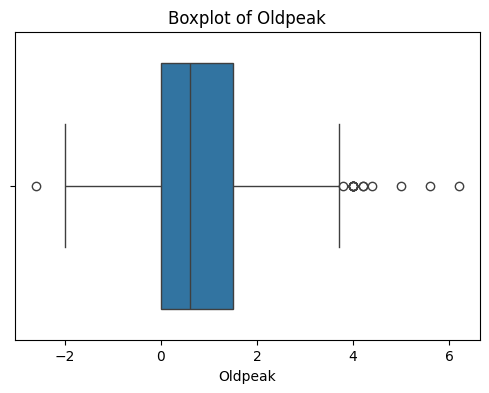

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

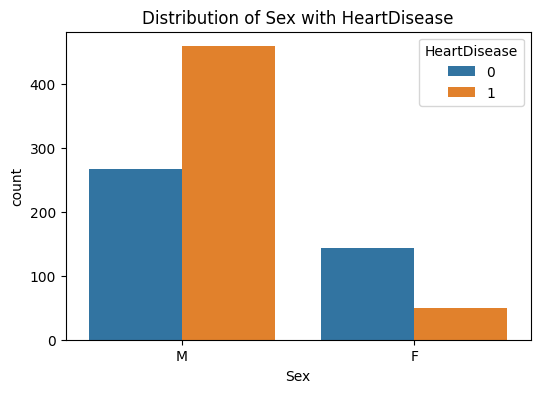

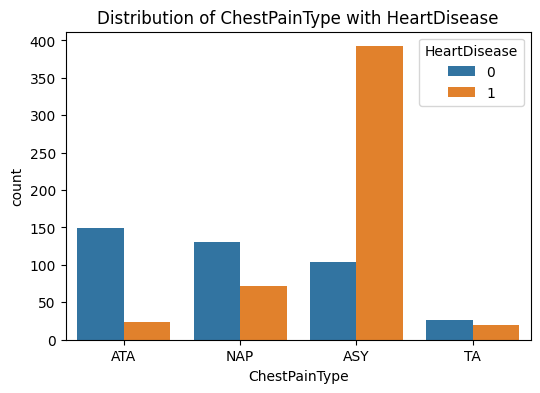

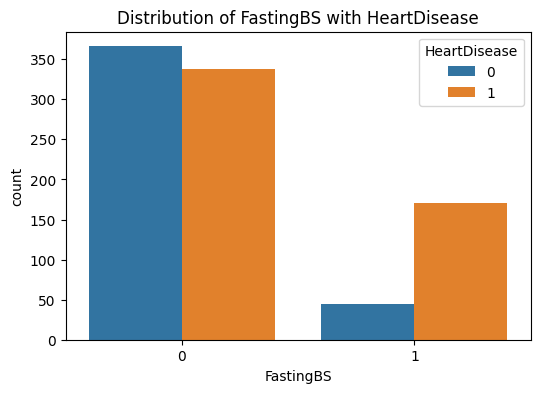

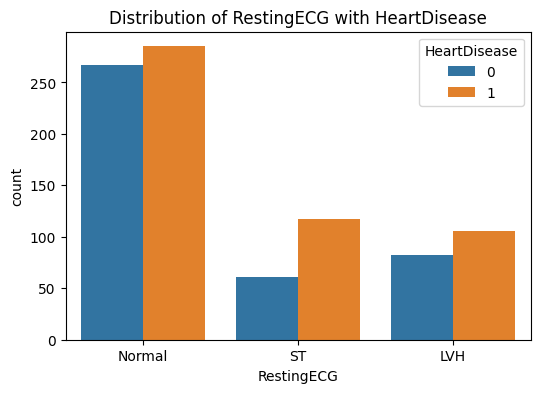

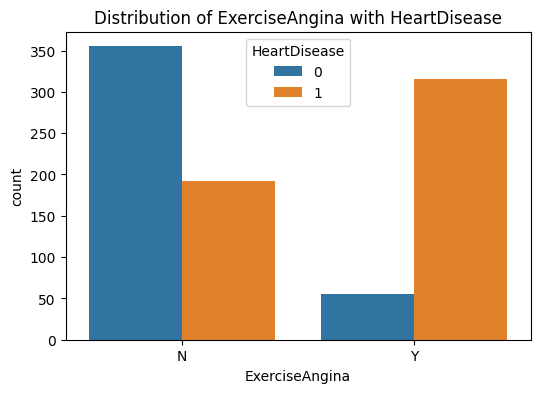

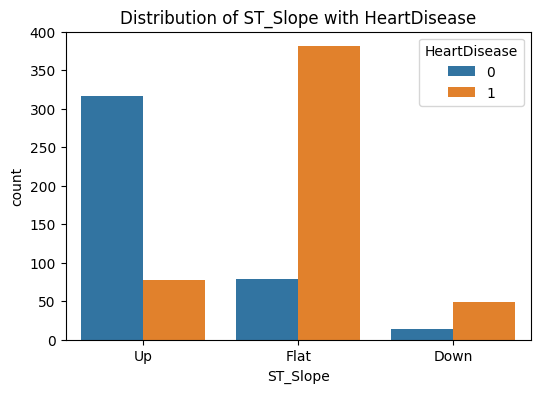

In [ ]:
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='HeartDisease')
    plt.title(f'Distribution of {col} with HeartDisease')
    plt.show()

In [ ]:
# Data Preprocessing

In [ ]:
lbl=LabelEncoder()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope']
for col in categorical_columns:
    data[col] = lbl.fit_transform(data[col])

In [ ]:
# Select numerical columns to scale
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
# Apply StandardScaler to numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

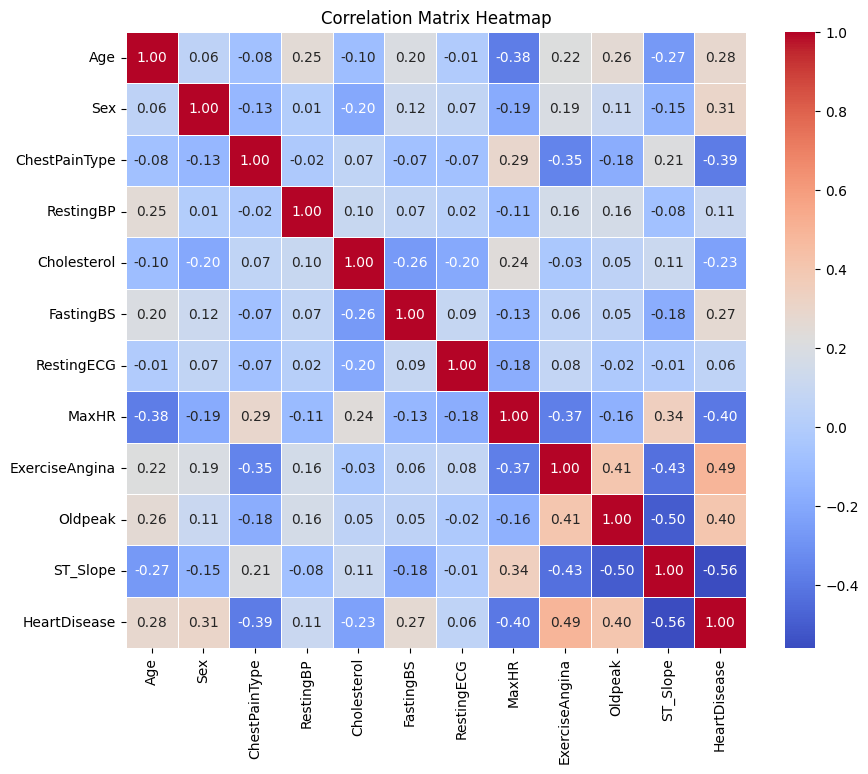

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Model Creation

In [ ]:
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']

In [ ]:
#train:%80 test:%20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)

In [ ]:
#to improve accuracy
k_fold = KFold(n_splits= 5, shuffle=True, random_state=42)
model = RandomForestClassifier(
    random_state=42,
    n_estimators=50,       # Fewer trees
    max_depth=8,           # Limit depth
    min_samples_split=10,  # Require more samples to split
    min_samples_leaf=5,    # Require minimum samples in a leaf node
    class_weight='balanced'
)
scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
print("Cross-validation scores:", scores)
model.fit(X_train, y_train)

Cross-validation scores: [0.86956522 0.89130435 0.89673913 0.82513661 0.84699454]


RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [ ]:
y_predTest=model.predict(X_test)
y_predTrain=model.predict(X_train)

In [ ]:
print("\nAccuracy Score:")
print(f"Random Forest Train Accuracy: {accuracy_score(y_train, y_predTrain)*100:.2f}")
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_predTest)*100:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_predTest))


Accuracy Score:
Random Forest Train Accuracy: 91.55
Random Forest Test Accuracy: 85.87

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        77
           1       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



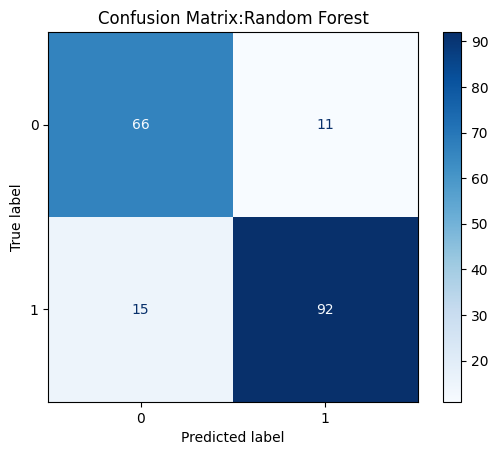

In [ ]:
# Confusion Matrix
y_pred = model.predict(X_test) # Assign the predictions to y_pred

cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix:Random Forest')
plt.show()

In [ ]:
#SVM

In [ ]:
#to improve accuracy
k_fold = KFold(n_splits= 5, shuffle=True, random_state=42)

In [ ]:
# Create and train the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Initialize the SVM model
svm_model.fit(X_train, y_train)  # Train the model using the training data

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test)
# Calculate training accuracy for SVM
svm_train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
print(f"SVM Training Accuracy: {svm_train_accuracy*100:.2f}")

# Calculate testing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Test Accuracy: {accuracy*100:.2f}')
# Generate classification report
classification_report_output = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:\n")
print(classification_report_output)

SVM Training Accuracy: 86.10
SVM Test Accuracy: 84.24
Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        77
           1       0.90      0.82      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



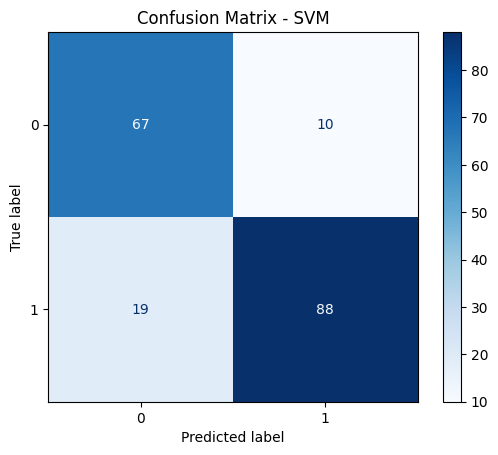

In [ ]:
# Confusion Matrix for SVM
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.show()

In [ ]:
#DECISION TREE

In [ ]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(
    max_depth=5,          # Limit depth of the tree
    min_samples_split=20, # Require more samples to split
    min_samples_leaf=10,  # Require more samples in a leaf node
)

# Train the model
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Calculate training accuracy for Decision Tree
dt_train_accuracy = accuracy_score(y_train, clf.predict(X_train))
print(f"Decision Tree Training Accuracy: {dt_train_accuracy*100:.2f}")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Testing Accuracy: {accuracy*100:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Decision Tree Training Accuracy: 87.33
Decision Tree Testing Accuracy: 87.50
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        77
           1       0.93      0.85      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



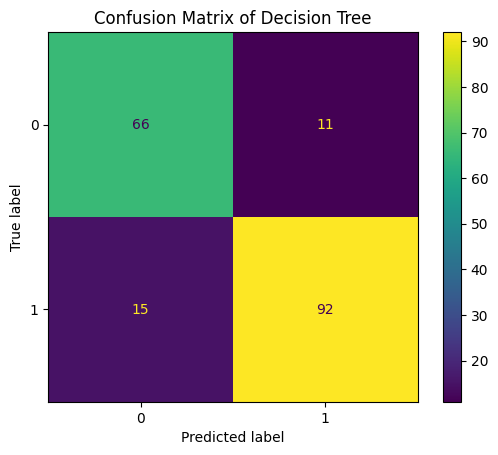

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create and display the confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree")
plt.show()

In [ ]:
#XGBOOST

In [ ]:
RANDOM_STATE = 42
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    verbosity=1,
    random_state=RANDOM_STATE,
    early_stopping_rounds=10
)

# Splitting training data for evaluation
total_train_size = int(len(X_train) * 0.8)
X_train_fit, X_train_eval = X_train[:total_train_size], X_train[total_train_size:]
y_train_fit, y_train_eval = y_train[:total_train_size], y_train[total_train_size:]

# Fitting the XGBoost model with evaluation set
xgb_model.fit(X_train_fit, y_train_fit, eval_set=[(X_train_eval, y_train_eval)], verbose=True)

# Getting the best iteration
best_iteration = xgb_model.best_iteration
print(f"Best Iteration: {best_iteration}")

# Calculating metrics for training and validation sets
xgb_train_accuracy = accuracy_score(xgb_model.predict(X_train), y_train)
xgb_val_accuracy = accuracy_score(xgb_model.predict(X_train_eval), y_train_eval)

print(f"XGBOOST train:\n\tAccuracy score: {xgb_train_accuracy*100:.4f}")
print(f"XGBOOST test:\n\tAccuracy score: {xgb_val_accuracy*100:.4f}")
# Make predictions on the entire training data
y_train_pred = xgb_model.predict(X_train)

# Get the classification report
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

[0]	validation_0-logloss:0.65141
[1]	validation_0-logloss:0.61289
[2]	validation_0-logloss:0.57978
[3]	validation_0-logloss:0.55206
[4]	validation_0-logloss:0.53208
[5]	validation_0-logloss:0.51400
[6]	validation_0-logloss:0.49931
[7]	validation_0-logloss:0.48811
[8]	validation_0-logloss:0.47774
[9]	validation_0-logloss:0.46886
[10]	validation_0-logloss:0.46085
[11]	validation_0-logloss:0.45548
[12]	validation_0-logloss:0.44708
[13]	validation_0-logloss:0.44139
[14]	validation_0-logloss:0.43883
[15]	validation_0-logloss:0.43477
[16]	validation_0-logloss:0.43001
[17]	validation_0-logloss:0.42758
[18]	validation_0-logloss:0.42509
[19]	validation_0-logloss:0.42362
[20]	validation_0-logloss:0.42338
[21]	validation_0-logloss:0.42272
[22]	validation_0-logloss:0.41947
[23]	validation_0-logloss:0.42172
[24]	validation_0-logloss:0.41755
[25]	validation_0-logloss:0.41938
[26]	validation_0-logloss:0.41837
[27]	validation_0-logloss:0.41792
[28]	validation_0-logloss:0.41807
[29]	validation_0-loglos

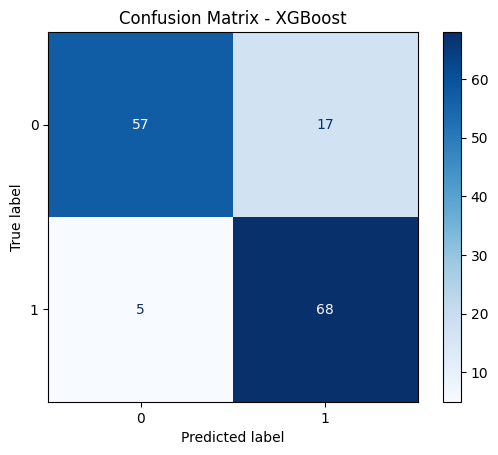

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicting on the evaluation set
y_pred_eval = xgb_model.predict(X_train_eval)

# Compute confusion matrix
cm = confusion_matrix(y_train_eval, y_pred_eval)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost')
plt.show()
